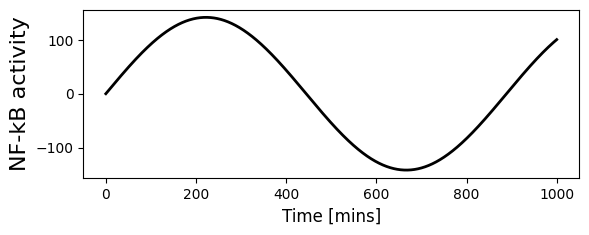

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.font_manager

def simple(x,t):
    x1 = x[0]
    y1 = x[1]
    S = 1              
    alpha = 0
    beta = 0.001           
    gamma = 0.05         
    delta=  0
    
    xd = S-alpha*x1-beta*y1
    yd = gamma*x1-delta*y1

    return [xd,yd]

t=np.linspace(0,1000,10000)
x0 = [0,0]
x = odeint(simple,x0,t)

plt.figure()
plt.subplot(211)
plt.plot(t, x[:,0], 'k-', linewidth=2)
plt.xlabel('Time [mins]', fontsize=12)
plt.ylabel('NF-kB activity', fontsize= 16)

plt.show()

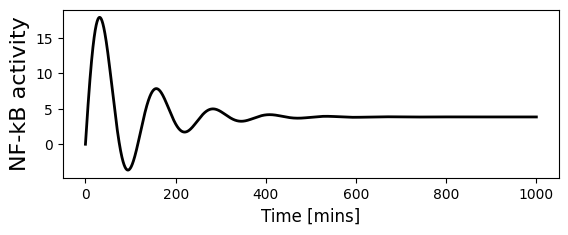

In [2]:
def simple(x,t):
    x1 = x[0]
    y1 = x[1]
    S = 1              
    alpha = 0.01         
    beta = 0.05           
    gamma = 0.05       
    delta=  0.01
    
    xd = S-alpha*x1-beta*y1
    yd = gamma*x1-delta*y1

    return [xd,yd]

t=np.linspace(0,1000,10000)
x0 = [0,0]
x = odeint(simple,x0,t)

plt.figure(1)
plt.subplot(211)
plt.plot(t, x[:,0], 'k-', linewidth=2)
plt.xlabel('Time [mins]', fontsize=12)
plt.ylabel('NF-kB activity', fontsize= 16)

plt.show()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.font_manager

In [19]:
#Define model parameters
#######################################################
## Volume ### 
kv = 3.3               # (Ashall et al.).
## Total NFkB and IKK ###
nfkbtot=100000         # Total NFkB (Ashall et al.)
ikktot= 100000         # Total IKK (Ashall et al.)
## Transcription rates
c1 = 0.005            # Inducible A20 mRNA synthesis, assumed
c1a = 0.2              # Inducible IkBa mrNa synthesisRefitted
h = 2                   # Order of hill function controlling transcription. Assumed as 2 required binding sites on each promoter (Ito et al., 1994  Kearns et al., 2006  Krikos et al., 1992)  
## Translation
c2 = 0.5                # A20 translation  Free parameter   (Ashall et al.)
c2a = 0.5               # Ikba translation Free parameter (Ashall et al.)
## Cytokine half life
c5 = 0.000037           # Half life of TNF and IL-1 assumed
##  Association and Dissociation
ka1a = 8.0e-07          # Association rate 2.4 - 8.01 (Hoffmann 2002) 
kd1a = 0.0008           # Dissociation rate
## Degradation rates
c3a =  4.4000e-04       # IKBA mRNA degradation 0.00077 - 0.00029 (Blattner 2000) 
c4a = 7.600e-04         # IKBA degradation rate
c3=  6.60e-04           # A20 mRNA degradation (18mins)
c4 = 7.500e-04          # A20 degradation rate assumed 
## Transport
ki1  = 0.0026           # Free NFkB import (0.0026 ± 0.0018,Ashall et al.)
ki3a  = 0.001           # IKBA import rate (Ashall et al.)
ke2a = 0.01             # Free: NFkB.IkB complex nuclear export
## Transcription
k=2.111e3               # Transcription hill function half max constant
## A20 - IKKK degradation rate
ka20 = 0.00023 
## IKK interactions
kc1a = 9.8234e-08        # Catalysis of IKK.IkBa dimer
kc2a = 8.5510e-07        # Catalysis of IKK.IkBa.NFkB trimer
kt2a = 0.1               # Degradation of IkBa (IKK dependent from trimer)
## IKK kinetics
kp = 0.00033             # Recovery of IKK
ka = 0.0014              # Activation caused by TNF  
ki = 0.0020              # Spontanouous IKK inactivation 
ha = 3                   # Hill function for IKKK activation
m1=0.005                 # IKKK activation rate
sIKKK = 350              # Threshold for IKKK activation
m2 = 0.0005              # IKKK inactivation rate
m3= 0.0005               # IKKK recovery rare
## Receptor kinetics
r1= 4e-09              # Receptor activation rate in nl volumes
r2= 0.0032               # Receptor turnover rate 
Rtot =2500               # Total receptor
st =50                   # Receptor stimulation factor
## NFKB and IkBa export       
ke1 = ki1/50             # NFkB nuclear export (Ashall et al.)
ke3a  = ki3a/2           # IkBa nuclear export (Ashall et al.)
## IKKK interactions
IKKKtott = 100000        # Total IKKK in TNF transduction pathway 
IKKKtoti = 200000        # Total IKKK in IL-1 transduction pathway 

par=[kv,nfkbtot,ikktot,c1,c1a,h,ke1,ke3a,c2,c2a,c5,ka1a,kd1a,c3a,c4a, ki1,ki3a,ke2a,k,ka20,kc1a,kc2a,kt2a,kp,ka,ki,c3,c4,st,ha,r1,r2,Rtot,sIKKK,m1,m2,m3,IKKKtott,IKKKtoti]

In [20]:
#Define model parameters
#######################################################
## Volume ### 
kv = 3.3               # (Ashall et al.).
## Total NFkB and IKK ###
nfkbtot=100000         # Total NFkB (Ashall et al.)
ikktot= 100000         # Total IKK (Ashall et al.)
## Transcription rates
c1 = 0.005            # Inducible A20 mRNA synthesis, assumed
c1a = 0.2              # Inducible IkBa mrNa synthesisRefitted
h = 2                   # Order of hill function controlling transcription. Assumed as 2 required binding sites on each promoter (Ito et al., 1994  Kearns et al., 2006  Krikos et al., 1992)  
## Translation
c2 = 0.5                # A20 translation  Free parameter   (Ashall et al.)
c2a = 0.5               # Ikba translation Free parameter (Ashall et al.)
## Cytokine half life
c5 = 0.000037           # Half life of TNF and IL-1 assumed
##  Association and Dissociation
ka1a = 8.0e-07          # Association rate 2.4 - 8.01 (Hoffmann 2002) 
kd1a = 0.0008           # Dissociation rate
## Degradation rates
c3a =  4.4000e-04       # IKBA mRNA degradation 0.00077 - 0.00029 (Blattner 2000) 
c4a = 7.600e-04         # IKBA degradation rate
c3=  6.60e-04           # A20 mRNA degradation (18mins)
c4 = 7.500e-04          # A20 degradation rate assumed 
## Transport
ki1  = 0.0026           # Free NFkB import (0.0026 ± 0.0018,Ashall et al.)
ki3a  = 0.001           # IKBA import rate (Ashall et al.)
ke2a = 0.01             # Free: NFkB.IkB complex nuclear export
## Transcription
k=2.111e3               # Transcription hill function half max constant
## A20 - IKKK degradation rate
ka20 = 0.00023 
## IKK interactions
kc1a = 9.8234e-08        # Catalysis of IKK.IkBa dimer
kc2a = 8.5510e-07        # Catalysis of IKK.IkBa.NFkB trimer
kt2a = 0.1               # Degradation of IkBa (IKK dependent from trimer)
## IKK kinetics
kp = 0.00033             # Recovery of IKK
ka = 0.0014              # Activation caused by TNF  
ki = 0.0020              # Spontanouous IKK inactivation 
ha = 3                   # Hill function for IKKK activation
m1=0.005                 # IKKK activation rate
sIKKK = 350              # Threshold for IKKK activation
m2 = 0.0005              # IKKK inactivation rate
m3= 0.0005               # IKKK recovery rare
## Receptor kinetics
r1= 4e-09              # Receptor activation rate in nl volumes
r2= 0.0032               # Receptor turnover rate 
Rtot =2500               # Total receptor
st =50                   # Receptor stimulation factor
## NFKB and IkBa export       
ke1 = ki1/50             # NFkB nuclear export (Ashall et al.)
ke3a  = ki3a/2           # IkBa nuclear export (Ashall et al.)
## IKKK interactions
IKKKtott = 100000        # Total IKKK in TNF transduction pathway 
IKKKtoti = 200000        # Total IKKK in IL-1 transduction pathway 

par=[kv,nfkbtot,ikktot,c1,c1a,h,ke1,ke3a,c2,c2a,c5,ka1a,kd1a,c3a,c4a, ki1,ki3a,ke2a,k,ka20,kc1a,kc2a,kt2a,kp,ka,ki,c3,c4,st,ha,r1,r2,Rtot,sIKKK,m1,m2,m3,IKKKtott,IKKKtoti]

In [26]:
def NFkB(y,t,par):
    #Define variables
    #######################################################
    NFkB         = y[0]             # Free Cytoplasmic NFkB
    IkBa         = y[1]             # Free Cytoplasmic IkBa
    IkBaNFkB     = y[2]             # Cytoplasmic NFkB-IkBa
    nNFkB        = y[3]             # Free Nuclear NFkB
    nIkBa        = y[4]             # Free Nuclear IkBa
    nIkBaNFkB    = y[5]             # Nuclear NFkB-IkBa 
    tIkBa        = y[6]             # IkBa transcript
    IKKn         = y[7]             # IKKn
    IKKa         = y[8]             # Free active IKK     
    tA20         = y[9]            # A20 transript
    A20          = y[10]            # A20  
    IKKKnt       = y[11]            # Neutral IKKKat
    IKKKat       = y[12]            # Active IKKKat    
    Rt           = y[13]            # Active receptor
    TNF          = y[14]            # Extracellular TNFa
    IKKKni       = y[15]            # Neutral IKKKai
    IKKKai       = y[16]            # Active IKKKai
    Ri           = y[17]            # Active receptor
    IL           = y[18]            # Extracellular IL-1F
  
    #Write equations
    ####################################################### 
    pIkBaNFkB = par[1]-NFkB-IkBaNFkB-nNFkB-nIkBaNFkB  #Phospho IkBNF-kB as a function of other variables
    
    dy0 = par[12]*IkBaNFkB - par[11]*IkBa*NFkB - par[15]*NFkB + par[0]*par[6]*nNFkB + par[22]*pIkBaNFkB 
    dy1 = par[12]*IkBaNFkB - par[11]*IkBa*NFkB- par[16]*IkBa + par[0]*par[7]*nIkBa  - par[14]*IkBa + par[9]*tIkBa - par[20]*IKKa*IkBa 
    dy2 = par[11]*IkBa*NFkB - par[12]*IkBaNFkB + par[0]*par[17]*nIkBaNFkB - par[21]*IKKa*IkBaNFkB 
    dy3 = par[12]*nIkBaNFkB - par[11]*par[0]*nIkBa*nNFkB + par[15]*NFkB - par[0]*par[6]*nNFkB 
    dy4 = par[12]*nIkBaNFkB- par[11]*par[0]*nIkBa*nNFkB + par[16]*IkBa - par[0]*par[7]*nIkBa  - par[14]*nIkBa 
    dy5 = par[11]*par[0]*nIkBa*nNFkB - par[12]*nIkBaNFkB - par[0]*par[17]*nIkBaNFkB 
    dy6 = par[4]*(nNFkB**par[5]/(nNFkB**par[5] + par[18]**par[5])) - par[13]*tIkBa 
    dy7 = par[23]*(par[2]-IKKa-IKKn) - (IKKKat**par[29]/(IKKKat**par[29] + par[33]**par[29]))*par[24]*IKKn - ((IKKKai**par[29])/(IKKKai**par[29] + par[33]**par[29]))*par[24]*IKKn  
    dy8 = (IKKKat**par[29]/(IKKKat**par[29] + par[33]**par[29]))*par[24]*IKKn -par[25]*IKKa + (IKKKai**par[29]/(IKKKai**par[29] + par[33]**par[29]))*par[24]*IKKn 
    dy9 = par[3]*(nNFkB**par[5]/(nNFkB**par[5] + par[18]**par[5])) - par[26]*tA20 
    dy10 = par[8]*tA20 - par[27]*A20 
    dy11 = par[36]*(par[37]-IKKKat-IKKKnt) - (Rt/(Rt + par[28]))*par[34]*(IKKKnt) 
    dy12 = (Rt/(Rt + (par[28])))*par[34]*(IKKKnt) - (par[35]+par[19]*A20)*IKKKat 
    dy13 = par[30]*TNF*(par[32] - Rt)-(par[31])*Rt  
    dy14 = -par[10]*TNF -par[30]*(TNF)*(par[32] - Rt) 
    dy15 = par[36]*(par[38]-IKKKai-IKKKni) - (Ri/(Ri + par[28]))*par[34]*(IKKKni) 
    dy16 = (Ri/(Ri + par[28]))*par[34]*(IKKKni) - (par[35]+par[19]*A20)*IKKKai 
    dy17 = par[30]*IL*(par[32] - Ri)-par[31]*Ri  
    dy18 = -par[10]*IL -par[30]*(IL)*(par[32] - Ri) 
    
    #Return the state derrivative
    ####################################################### 
    return [dy0,dy1,dy2,dy3,dy4,dy5,dy6,dy7,dy8,dy9,dy10,dy11,dy12,dy13,dy14,dy15,dy16,dy17,dy18]    

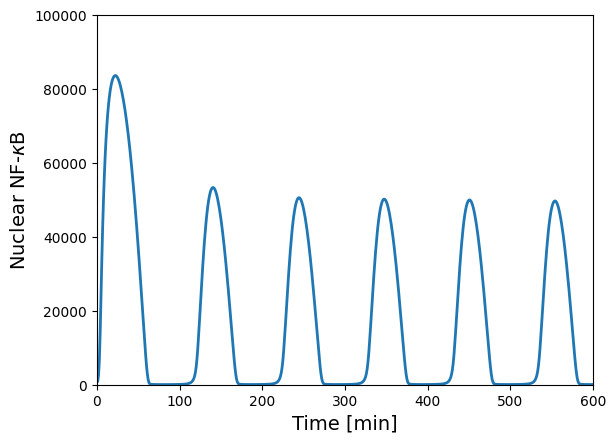

In [27]:
# Run simulations

#Set up initial conditions by providing total number of IKK and NFkB molecules
y0=np.zeros(19)
y0[2]=nfkbtot
y0[7]=ikktot

# simulation time
t = np.arange(0,3000*60,60)  

# simulate equilibration (no stimulation)
y=odeint(NFkB,y0,t,(par,))

#line = plt.plot(t/60, y[:,3], '-', linewidth=2)

# add stimulation
tnfdose=10 #ng/ml

#new initial conditions
y00=y[-1]   #initial condition will be the last value of the simulation without TNF
y00[14] +=tnfdose*10000 # TNF stimulation (no. of molecules for a cell in 1nl of culture medium)
t = np.arange(0,600*60,60)  

y1=odeint(NFkB,y00,t,(par,))

plt.figure() 


line = plt.plot(t/60, y1[:,3], '-', linewidth=2)
plt.xlabel('Time [min]', fontsize=14)
plt.ylabel('Nuclear NF-$\kappa$B', fontsize= 14)
plt.axis([0, 600, 0, nfkbtot])
plt.show()

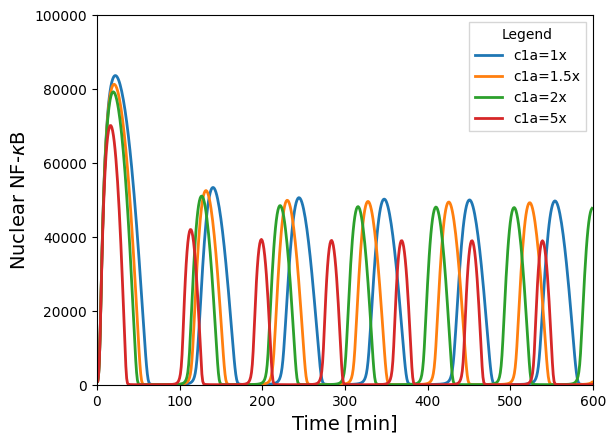

In [28]:
# Run simulations
#Set up initial conditions
y0=np.zeros(19)
y0[2]=nfkbtot
y0[7]=ikktot

# simulation time
t = np.arange(0,3000*60,60)  
# simulate equilibration (no stimulation)
y=odeint(NFkB,y0,t,(par,))

# add stimulation
tnfdose=10 #ng/ml

#new initial conditions
y00=y[-1]
y00[14] +=tnfdose*10000 # TNF stimulation (no. of molecules for a cell in 1nl of culture medium)
t = np.arange(0,600*60,60)  

#new initial conditions
pn=par[:]    #remeber nominal parameter values
y1=odeint(NFkB,y00,t,(pn,))

pp=par[4]  #check the code above to see that par[4] hides the value of c1a

pn[4]=pp*1.5
y2=odeint(NFkB,y00,t,(pn,))

pn[4]=pp*2  #check the code above to see that par[4] hides the value of c1a
y3=odeint(NFkB,y00,t,(pn,))

pn[4]=pp*5  #check the code above to see that par[4] hides the value of c1a
y4=odeint(NFkB,y00,t,(pn,))


plt.figure() 
line = plt.plot(t/60, y1[:,3], '-', linewidth=2, label="c1a=1x".format(3))
line = plt.plot(t/60, y2[:,3], '-', linewidth=2,label="c1a=1.5x".format(3))
line = plt.plot(t/60, y3[:,3], '-', linewidth=2,label="c1a=2x".format(3))
line = plt.plot(t/60, y4[:,3], '-', linewidth=2,label="c1a=5x".format(3))
plt.xlabel('Time [min]', fontsize=14)
plt.ylabel('Nuclear NF-$\kappa$B', fontsize= 14)
plt.axis([0, 600, 0, nfkbtot])
plt.legend(loc="upper right",ncol=1, title="Legend", fancybox=False)
plt.show()

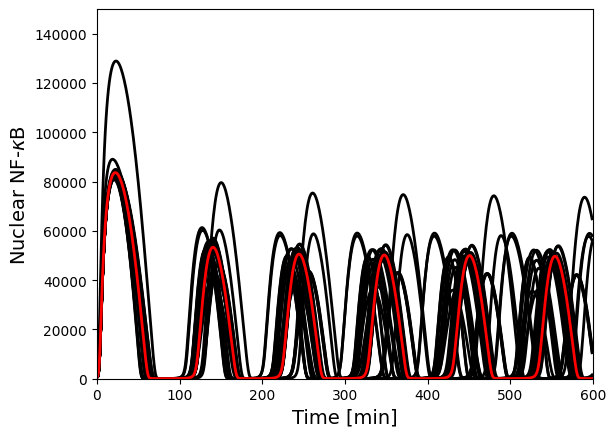

In [29]:
# Run simulations
#Set up initial conditions
y0=np.zeros(19)
y0[2]=nfkbtot
y0[7]=ikktot

# simulation time
t = np.arange(0,3000*60,60)  
y=odeint(NFkB,y0,t,(par,))
# add stimulation

tnfdose=10 #ng/ml
y00=y[-1]
y00[14] +=tnfdose*10000 # TNF stimulation (no. of molecules for a cell in 1nl of culture medium)
t = np.arange(0,600*60,60)  
y_n=odeint(NFkB,y00,t,(par,))

plt.figure() 

for i in range(0,38):
    pn=par[:]
    pp=par[i]
    pn[i]=pp*1.5
    y1=odeint(NFkB,y00,t,(pn,))
    # the new trajectory has been calculated here. Now we need to calculate some of its characteristics, e.g. amplitude
    # and store it in a vector for the future use. For example, max(y1[0:100,3]) will give as an amplitude of the first peak.
    # Let's define a vector say S=np.zeros(5), and for each i in the loop assign the amplitude to it: i.e. S[i]=max(y1[0:100,3])
    # After executing the whole loop, we can then divide each element of S by amplitude for the nominal parameter value.
    # Having done this, simply plot normalised sensitivities to find out which parameteres are important. 
    # What does this tell us about the Nf-kB system and our model?
    plt.plot(t/60, y1[:,3], 'k-', linewidth=2)
    plt.ion() 

plt.plot(t/60, y_n[:,3], 'r-', linewidth=2)
plt.xlabel('Time [min]', fontsize=14)
plt.ylabel('Nuclear NF-$\kappa$B', fontsize= 14)
plt.axis([0, 600, 0, 1.5*nfkbtot])
plt.ion()    
